### Business case: To predict whether the customers are subscribing to the term deposit or not

#### About the dataset
- The data set is related with direct marketing campaigns of a portuguese banking institution.

- The direct phone call marketing campaigns, which aim to promote term deposits among existing           customers, by a Portuguese banking institution from May 2008 to November 2010. 

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
data= pd.read_csv('bank-additional-full.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Domain Analysis

### Basic Checks 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Exploratory data analysis (EDA)

### Univariate analysis

In [7]:
import sweetviz as sv

report = sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights

- Majority of the clients are 30 to 40 years old.
- Most of the clients are doing as admin, blue collar and technician jobs.
- Majority of the clients are married.
- Majority of the clients did university degree.
- Nearly 80% of the clients are not defaulted ones.
- 50% clients took housing loan.
- 80% of the clients didn't took personal loan.
- 60% of the contact was done through cellular.
- About 33% were contacted by may month.
- Mon to fri took almost equal proportions i.e 20%.
- Duration is b/w 0.01k to 0.5k.
- Majority of the contacts for that client are b/w 2 to 7.
- Almost every client has a gap of 990+ days from the provious campaign.
- The provious contact was zero for 85% of the clients.
- We can see that only 3% of success from the previous marketing campaign.
- Employee variation rate 1.4 was about 40%.
- This index is ranging b/w 92 to 94.5.
- -36.4 index is about 18%.
- About 60% of the rate is b/w 4 to 4.8.
- 5228 has highest frequency which is 40%.
- About 11% of the people are subscribed to the term deposit.

### Bivariant analysis

In [8]:
# categorical columns

data1= data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome']]

# Numerical columns

data2= data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

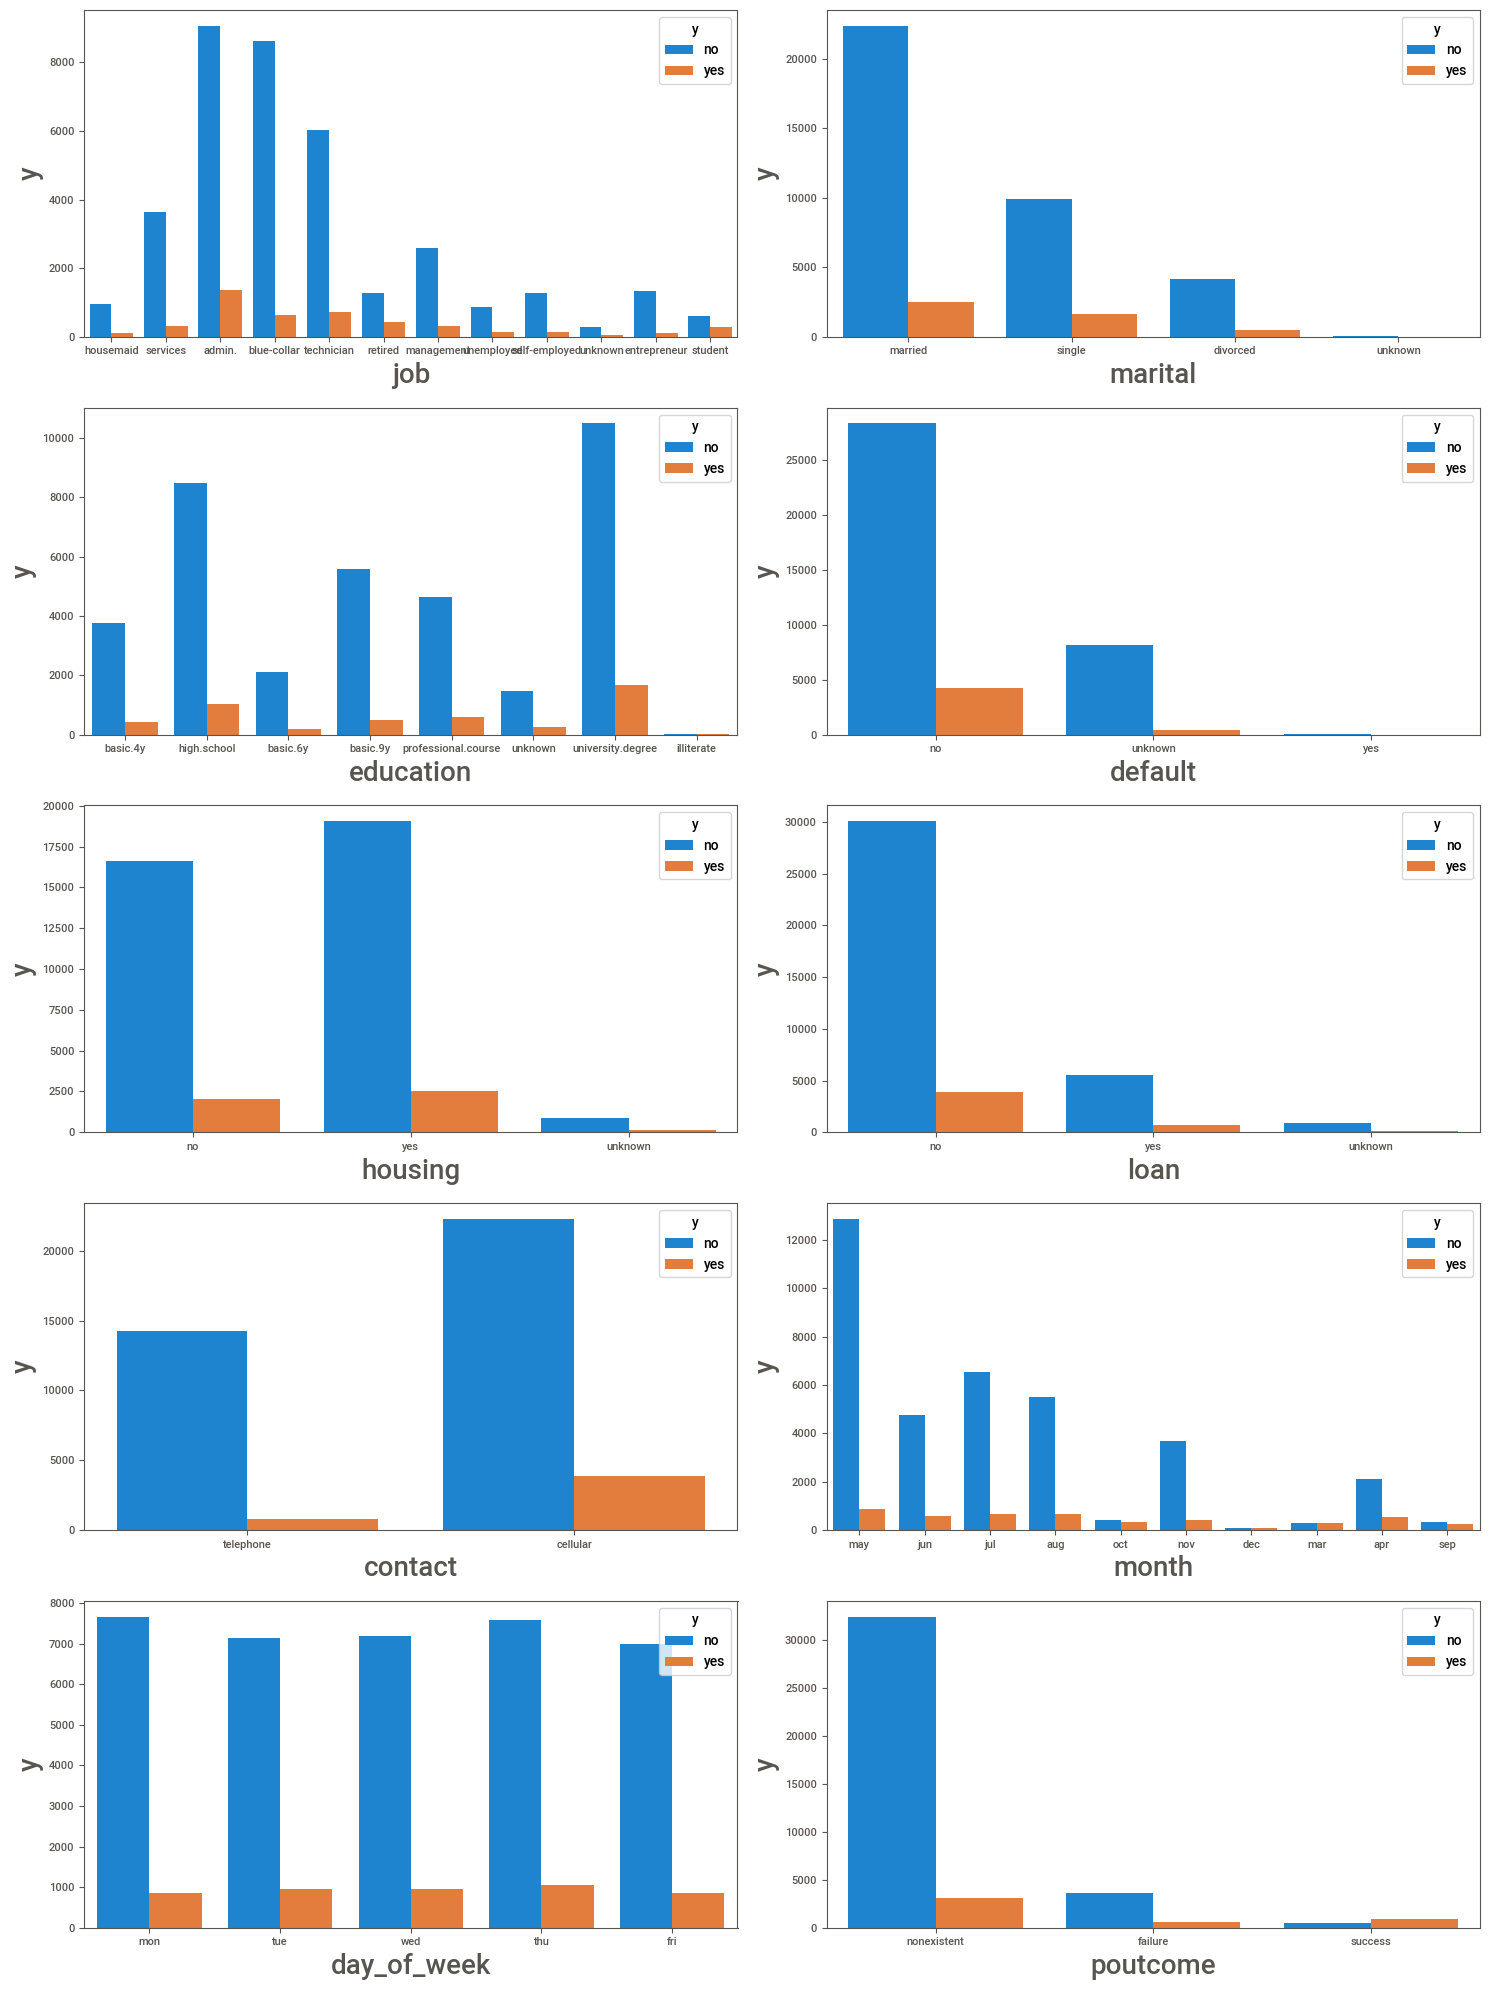

In [9]:
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=10 :
        ax = plt.subplot(5,2,plotnumber)
        sns.countplot(x=data1[column],hue=data['y'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('y',fontsize=20)
    plotnumber+=1
plt.tight_layout()

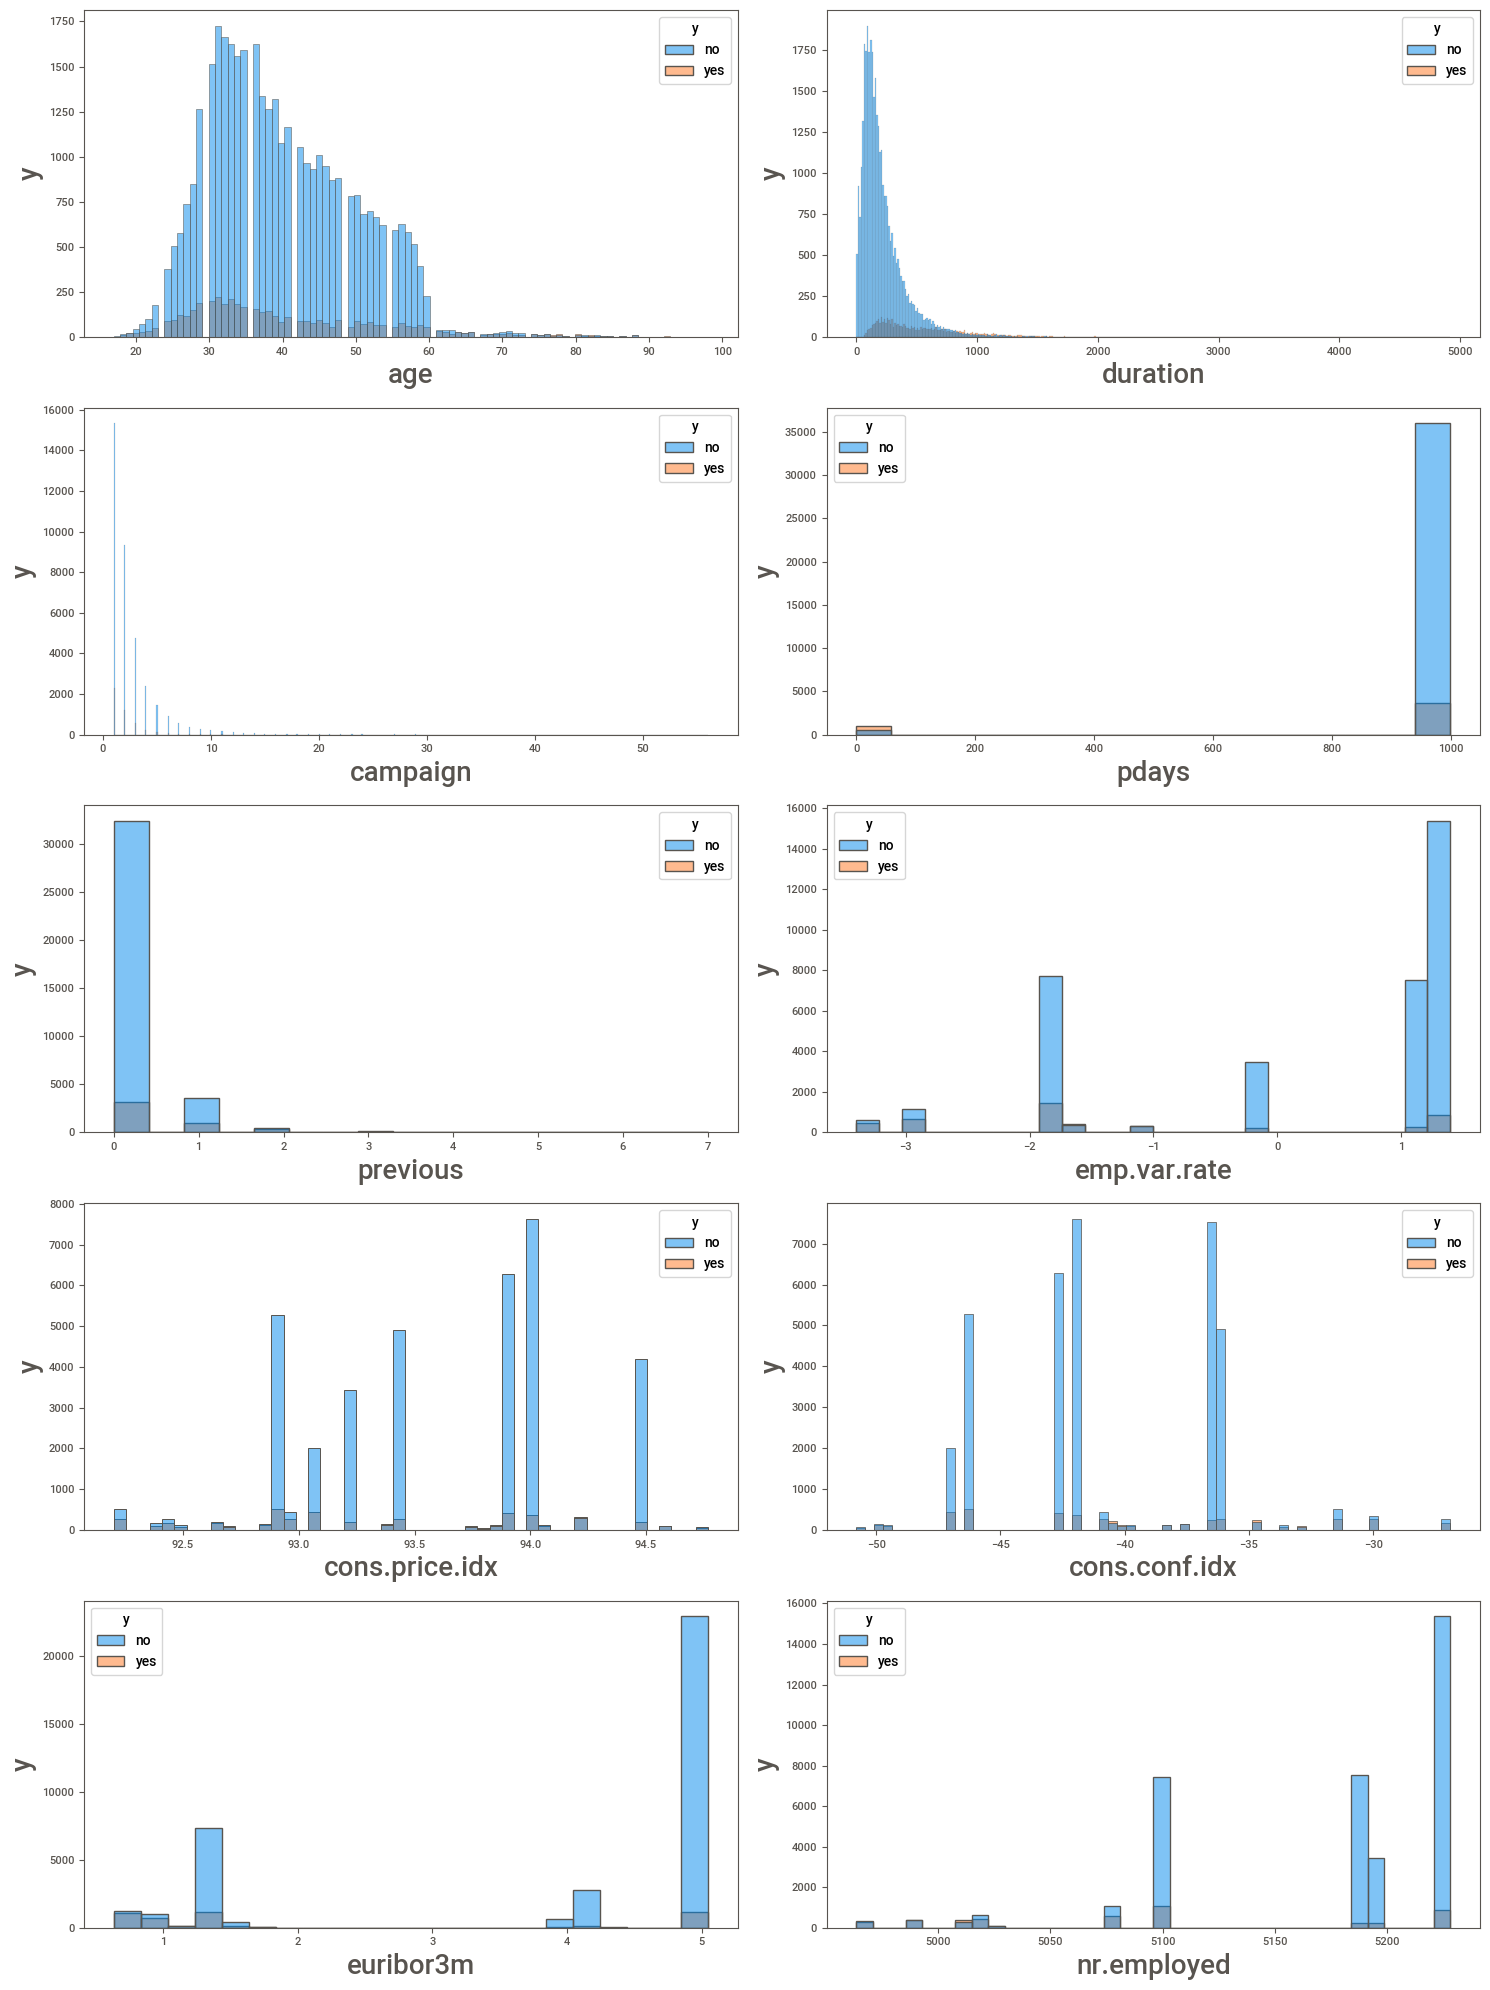

In [10]:
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in data2:
    if plotnumber<=10 :
        ax = plt.subplot(5,2,plotnumber)
        sns.histplot(x=data2[column],hue=data['y'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('y',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Insights

- The retired people and students are subscribing more to term deposits.

- Married people are subscribing more suprisingly with less count the singles are also subscribed       equally with married  people with slight difference.So we can say that married and singles are         important clients.

- We can see that the university degree people are subscribing more to term deposit followed by high     school. basic.6y people are less in subscribing.

- The non defaulters are subscribing more.

- The people who took housing loan are subscribing to term deposit more followed by non housing people   with slight difference.

- The people who don't took personal loan are subscribing more to term deposit.

- Communication through cellular are subscribing more to term deposits.

- May,june,july,aug,april - These are the months where people have more subscription.

- Almost everyday from mon to fri are giving term deposit same with little differences.

- Successful campaign has more term deposits than other.

- The frequency is more between 20 to 30 years old  and 60+.

- When the duration is increasing the chances of subscribing to term deposit also increasing

- The lesser the contact number the more the term deposits.

- The clients who was contacted after long time subscribed to term deposit and the clients who was       contacted in less time also subscribed term deposit but there are very few people who was contacted   in less gap.

- From the graph we can say that if the client was contacted very few times i.e 1 to 3 the clients are 
  going to take term deposit.
  
- At every rate we can see that there are people who are subscribing to term deposits.

- The frequency is more between 93.4 to 93.8.

- The frequency is more at -39 to -40.

- When the euribor rate is between 0.6 to 1.8 the more clients are subscribing to term deposits.

- At 5191 the frequency is more


### Multivariant analysis

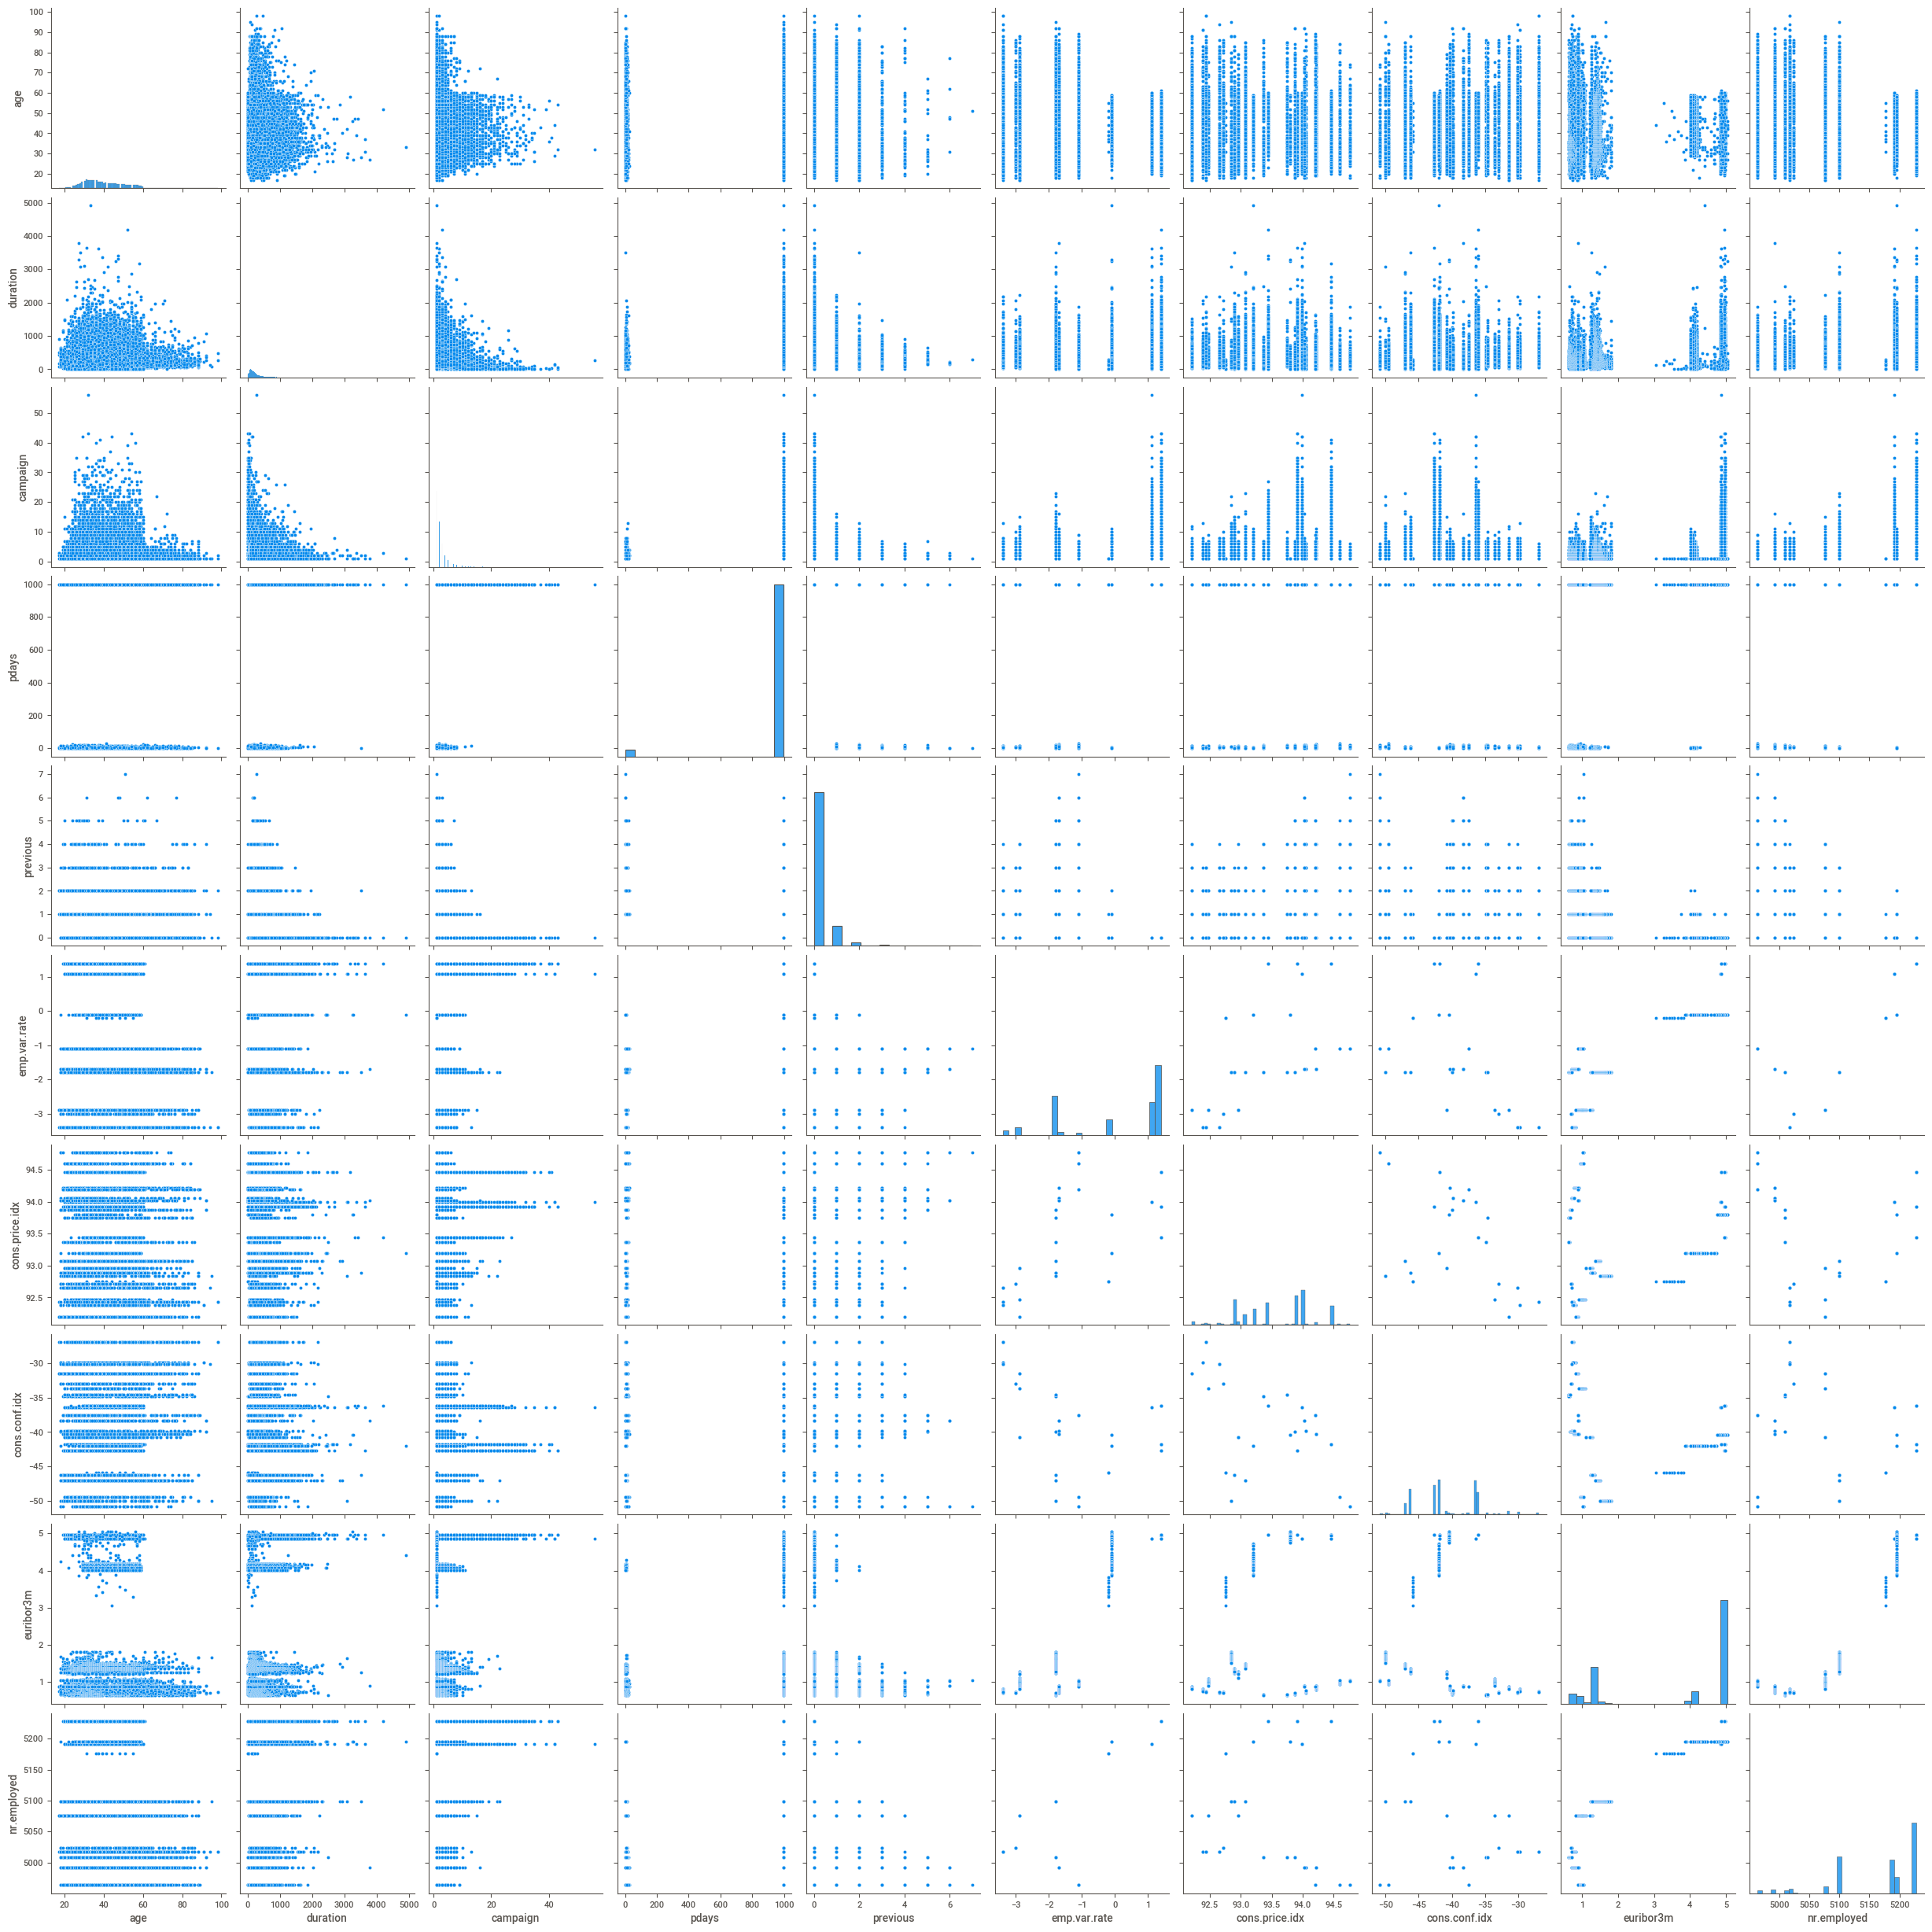

In [11]:
sns.pairplot(data=data)

### Data preprocessing

In [12]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
data.rename(columns={'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed'},inplace=True)

In [14]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [15]:
data.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [16]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [17]:
data.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [18]:
data.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [19]:
data.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [20]:
# Assigning the unknown values with high frequency values

data['job'] = data.loc[:,'job'].replace({'unknown':'admin.'})
data['marital'] = data.loc[:,'marital'].replace({'unknown':'married'})
data['education'] = data.loc[:,'education'].replace({'unknown':'university.degree'})
data['default'] = data.loc[:,'default'].replace({'unknown':'no'})
data['housing'] = data.loc[:,'housing'].replace({'unknown':'yes'})
data['loan'] = data.loc[:,'loan'].replace({'unknown':'no'})

### Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
data.job= le.fit_transform(data['job'])

In [23]:
data.marital = le.fit_transform(data['marital'])

In [24]:
data.education = le.fit_transform(data['education'])

In [25]:
data.default = data.default.map({'yes':1,'no':0})

In [26]:
data.housing = data.housing.map({'yes':1,'no':0})
data.loan = data.loan.map({'yes':1,'no':0})

In [27]:
data.contact = le.fit_transform(data['contact'])

In [28]:
data['month'] = data.month.replace({'jan':0,'feb':1, 'mar':2, 'apr':3,'may':4, 'jun':5,
                                   'jul':6,'aug':7,'sep':8, 'oct':9, 'nov':10, 'dec':11}) 

In [29]:
data['day_of_week'] = data.day_of_week.replace({'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4,})

In [30]:
data.poutcome = le.fit_transform(data['poutcome'])

In [31]:
data.y = data.y.map({'yes':1,'no':0})

### Checking outliers

In [32]:
df = data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']]


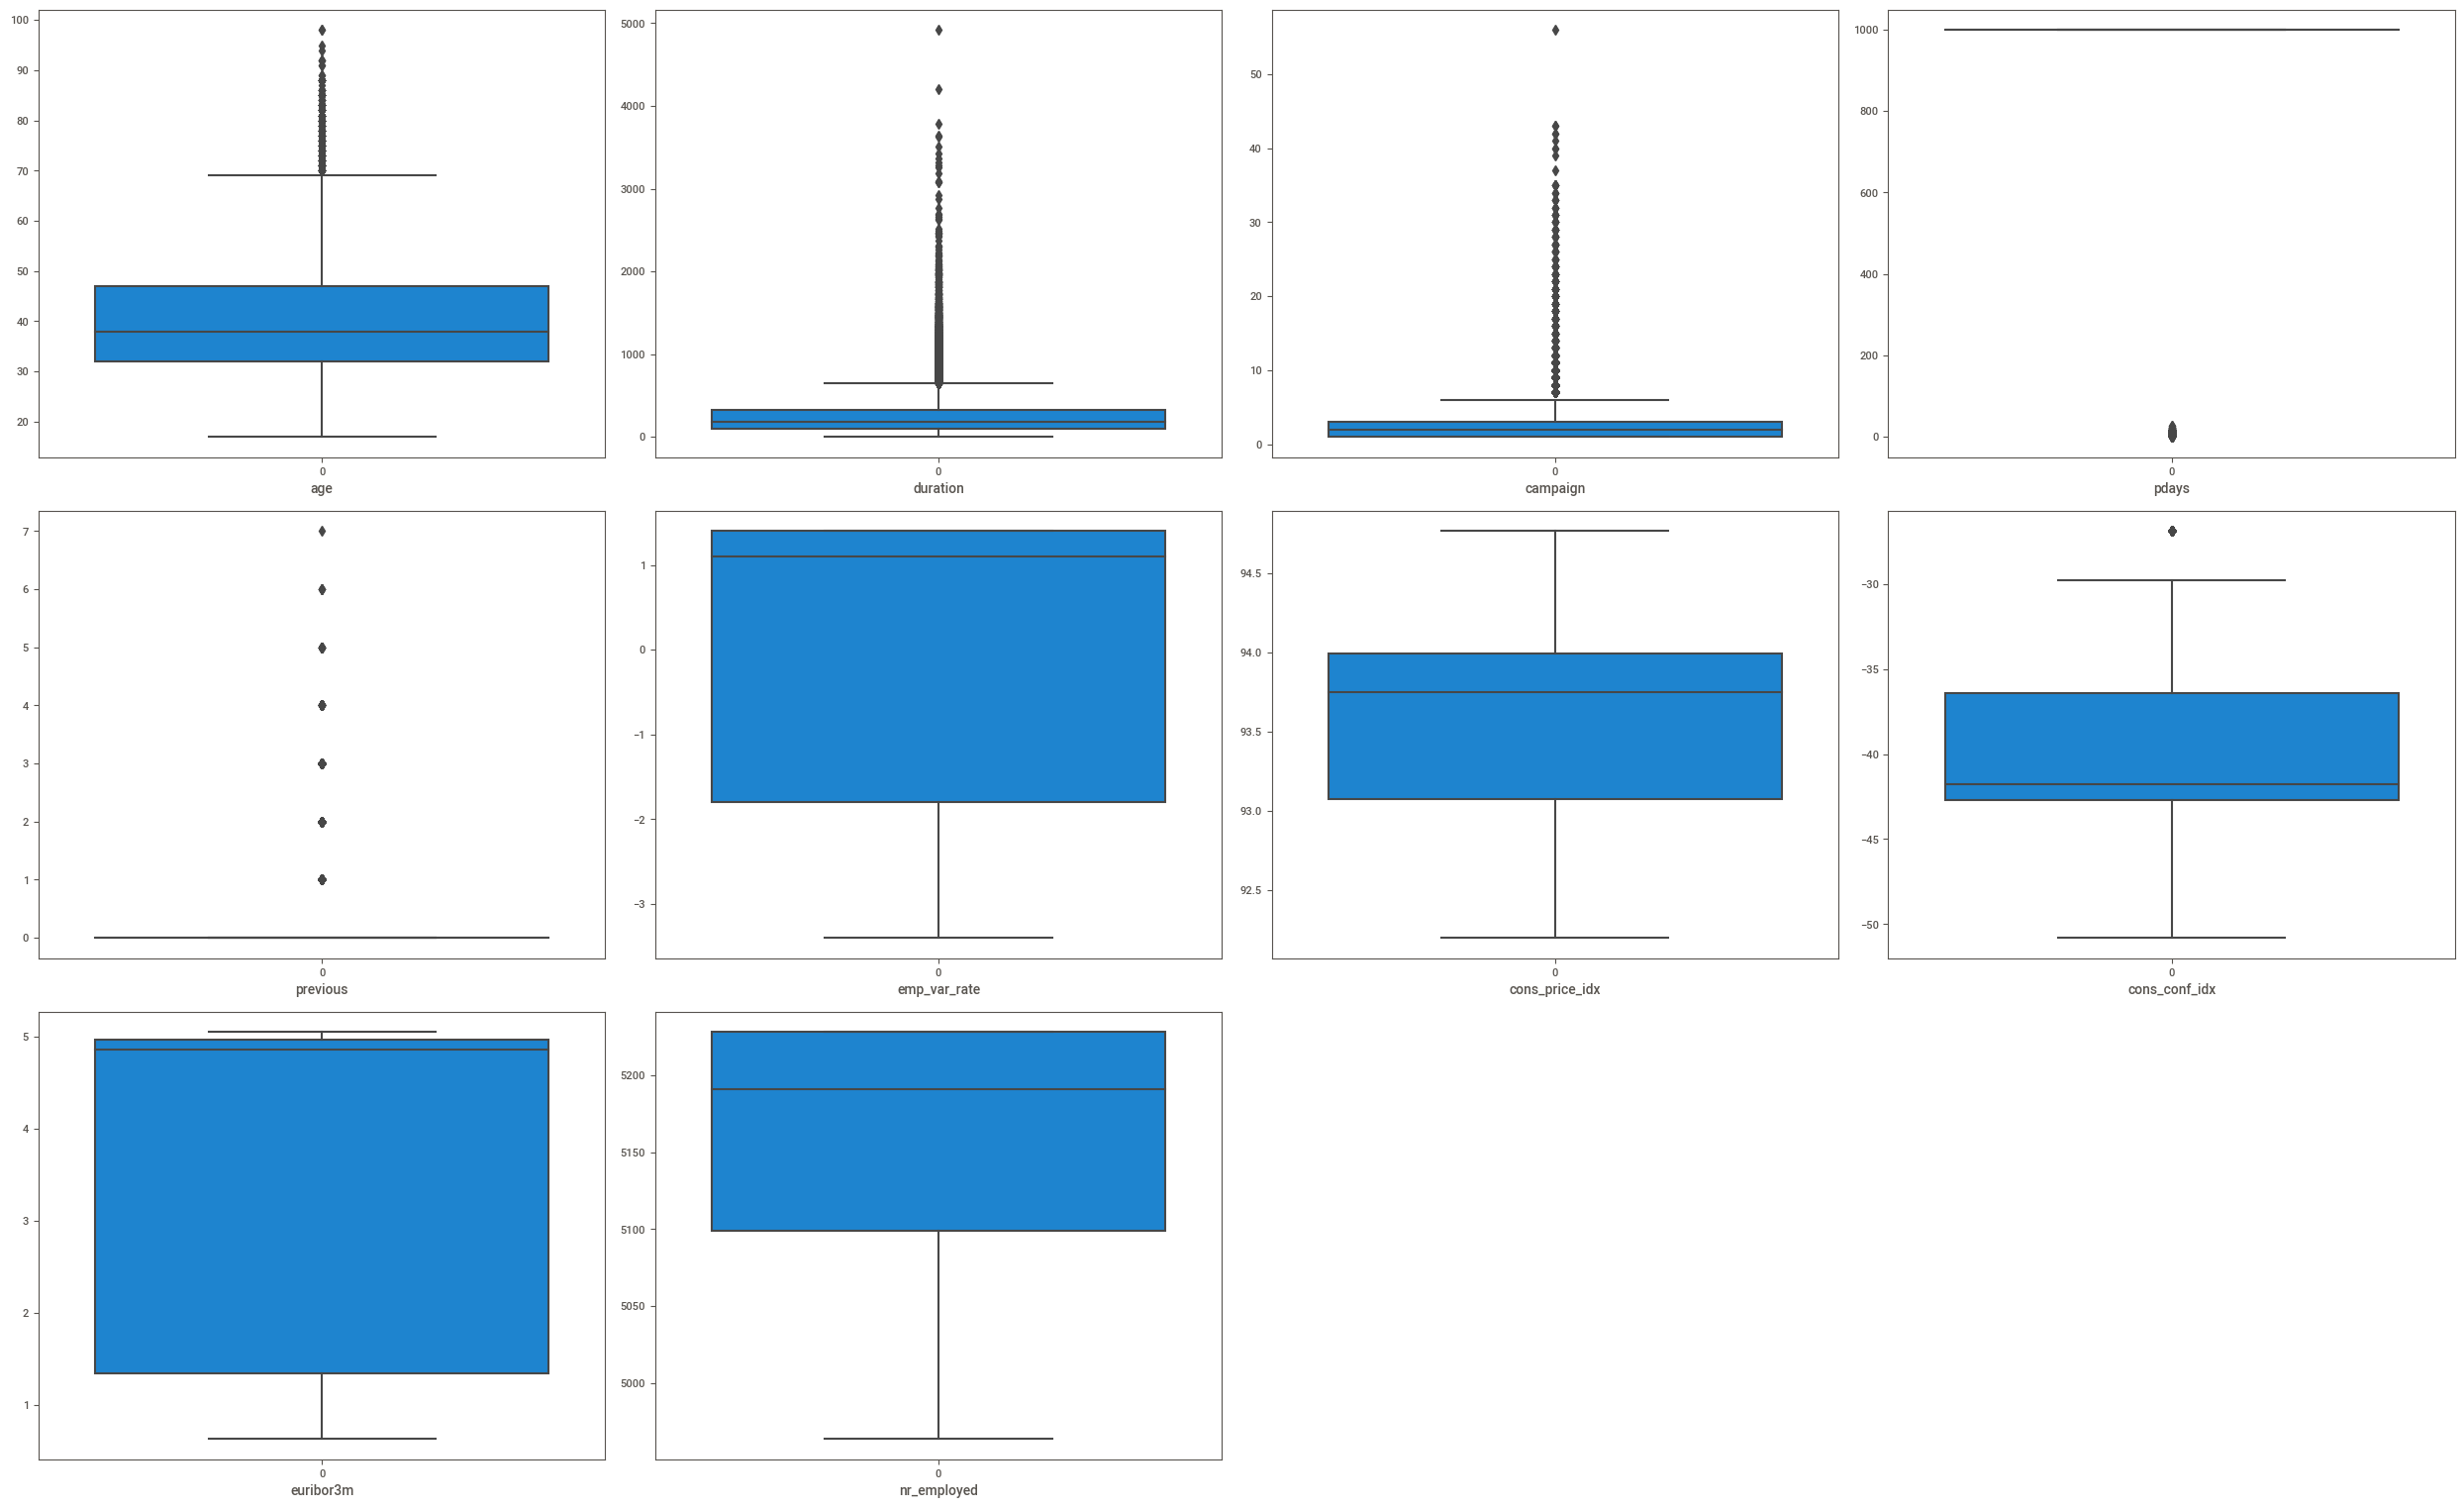

In [33]:
plt.figure(figsize=(25,20),facecolor='white')

plotnumber=1

for column in df:
    if plotnumber<=16 :
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
       
    plotnumber+=1
plt.tight_layout()

In [34]:
# Outliers found in age,duration,campaign,pdays,previous,cons.cof.idx

In [35]:
Q1 = df.quantile(0.25)  # np.percentile(data,25)

Q3 = df.quantile(0.75)

IQR = Q3-Q1

min_limit = Q1 - 1.5*IQR

max_limit = Q3 + 1.5*IQR

outliers_count = ((df > max_limit) | (df < min_limit)).sum()

outliers_percentage = (outliers_count/len(df))*100

print('\n Sum of Outliers:\n ',outliers_count)
print('\n Percentage of Outliers:\n ',outliers_percentage)


 Sum of Outliers:
  age                469
duration          2963
campaign          2406
pdays             1515
previous          5625
emp_var_rate         0
cons_price_idx       0
cons_conf_idx      447
euribor3m            0
nr_employed          0
dtype: int64

 Percentage of Outliers:
  age                1.138681
duration           7.193843
campaign           5.841507
pdays              3.678256
previous          13.656890
emp_var_rate       0.000000
cons_price_idx     0.000000
cons_conf_idx      1.085268
euribor3m          0.000000
nr_employed        0.000000
dtype: float64


### Handling outliers

#### Age

In [36]:
from scipy import stats

In [37]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
IQR = stats.iqr(df['age'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['age'] > max_limit) | (df['age'] < min_limit),'age'] = np.mean(df['age'])

#### Duration

In [38]:
Q1 = df.duration.quantile(0.25)
Q3 = df.duration.quantile(0.75)
IQR = stats.iqr(df['campaign'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['duration'] > max_limit) | (df['duration'] < min_limit),'duration'] = np.mean(df['duration'])

#### Campaign

In [39]:
Q1 = df.campaign.quantile(0.25)
Q3 = df.campaign.quantile(0.75)
IQR = stats.iqr(df['campaign'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['campaign'] > max_limit) | (df['campaign'] < min_limit),'campaign'] = np.mean(df['campaign'])

#### Pdays

In [40]:
Q1 = np.percentile(df.pdays,25)
Q3 = np.percentile(df.pdays,75)

IQR = stats.iqr(df['pdays'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR)

df.loc[(df['pdays'] > max_limit) | (df['pdays'] < min_limit),'pdays'] = np.median(df['pdays'])

#### Previous

In [41]:
Q1 = np.percentile(df.previous,25)
Q3 = np.percentile(df.previous,75)

IQR = stats.iqr(df['previous'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR)

df.loc[(df['previous'] > max_limit) | (df['previous'] < min_limit),'previous'] = np.median(df['previous'])

#### cons_conf_idx

In [42]:
Q1 = np.percentile(df.cons_conf_idx,25)
Q3 = np.percentile(df.cons_conf_idx,75)

IQR = stats.iqr(df['cons_conf_idx'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR)

df.loc[(df['cons_conf_idx'] > max_limit) | (df['cons_conf_idx'] < min_limit),'cons_conf_idx'] = np.median(df['cons_conf_idx'])

In [43]:
Q1 = df.quantile(0.25)  # np.percentile(data,25)

Q3 = df.quantile(0.75)

IQR = Q3-Q1

min_limit = Q1 - 1.5*IQR

max_limit = Q3 + 1.5*IQR

outliers_count = ((df > max_limit) | (df < min_limit)).sum()

outliers_percentage = (outliers_count/len(df))*100

print('\n Sum of Outliers:\n ',outliers_count)
print('\n Percentage of Outliers:\n ',outliers_percentage)


 Sum of Outliers:
  age               0
duration          0
campaign          0
pdays             0
previous          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
dtype: int64

 Percentage of Outliers:
  age               0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
emp_var_rate      0.0
cons_price_idx    0.0
cons_conf_idx     0.0
euribor3m         0.0
nr_employed       0.0
dtype: float64


In [44]:
data.drop(['duration'],axis=1,inplace=True)

In [45]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,3,1,0,0,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,0,10,4,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


### Scaling the data

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data3 = scaler.fit_transform(data[['age','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m', 'nr_employed']])

In [47]:
data[['age','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m', 'nr_employed']]= pd.DataFrame(data3)

In [48]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,1.533034,3,1,0,0,0,0,1,4,0,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
1,1.628993,7,1,3,0,0,0,1,4,0,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
2,-0.290186,7,1,3,0,1,0,1,4,0,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
3,-0.002309,0,1,1,0,0,0,1,4,0,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
4,1.533034,7,1,3,0,0,1,1,4,0,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,5,1,5,0,1,0,0,10,4,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1
41184,0.573445,1,1,5,0,0,0,0,10,4,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41185,1.533034,5,1,6,0,1,0,0,10,4,-0.204909,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41186,0.381527,9,1,5,0,0,0,0,10,4,-0.565922,0.195414,-0.349494,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1


### Feature Selection

<Axes: >

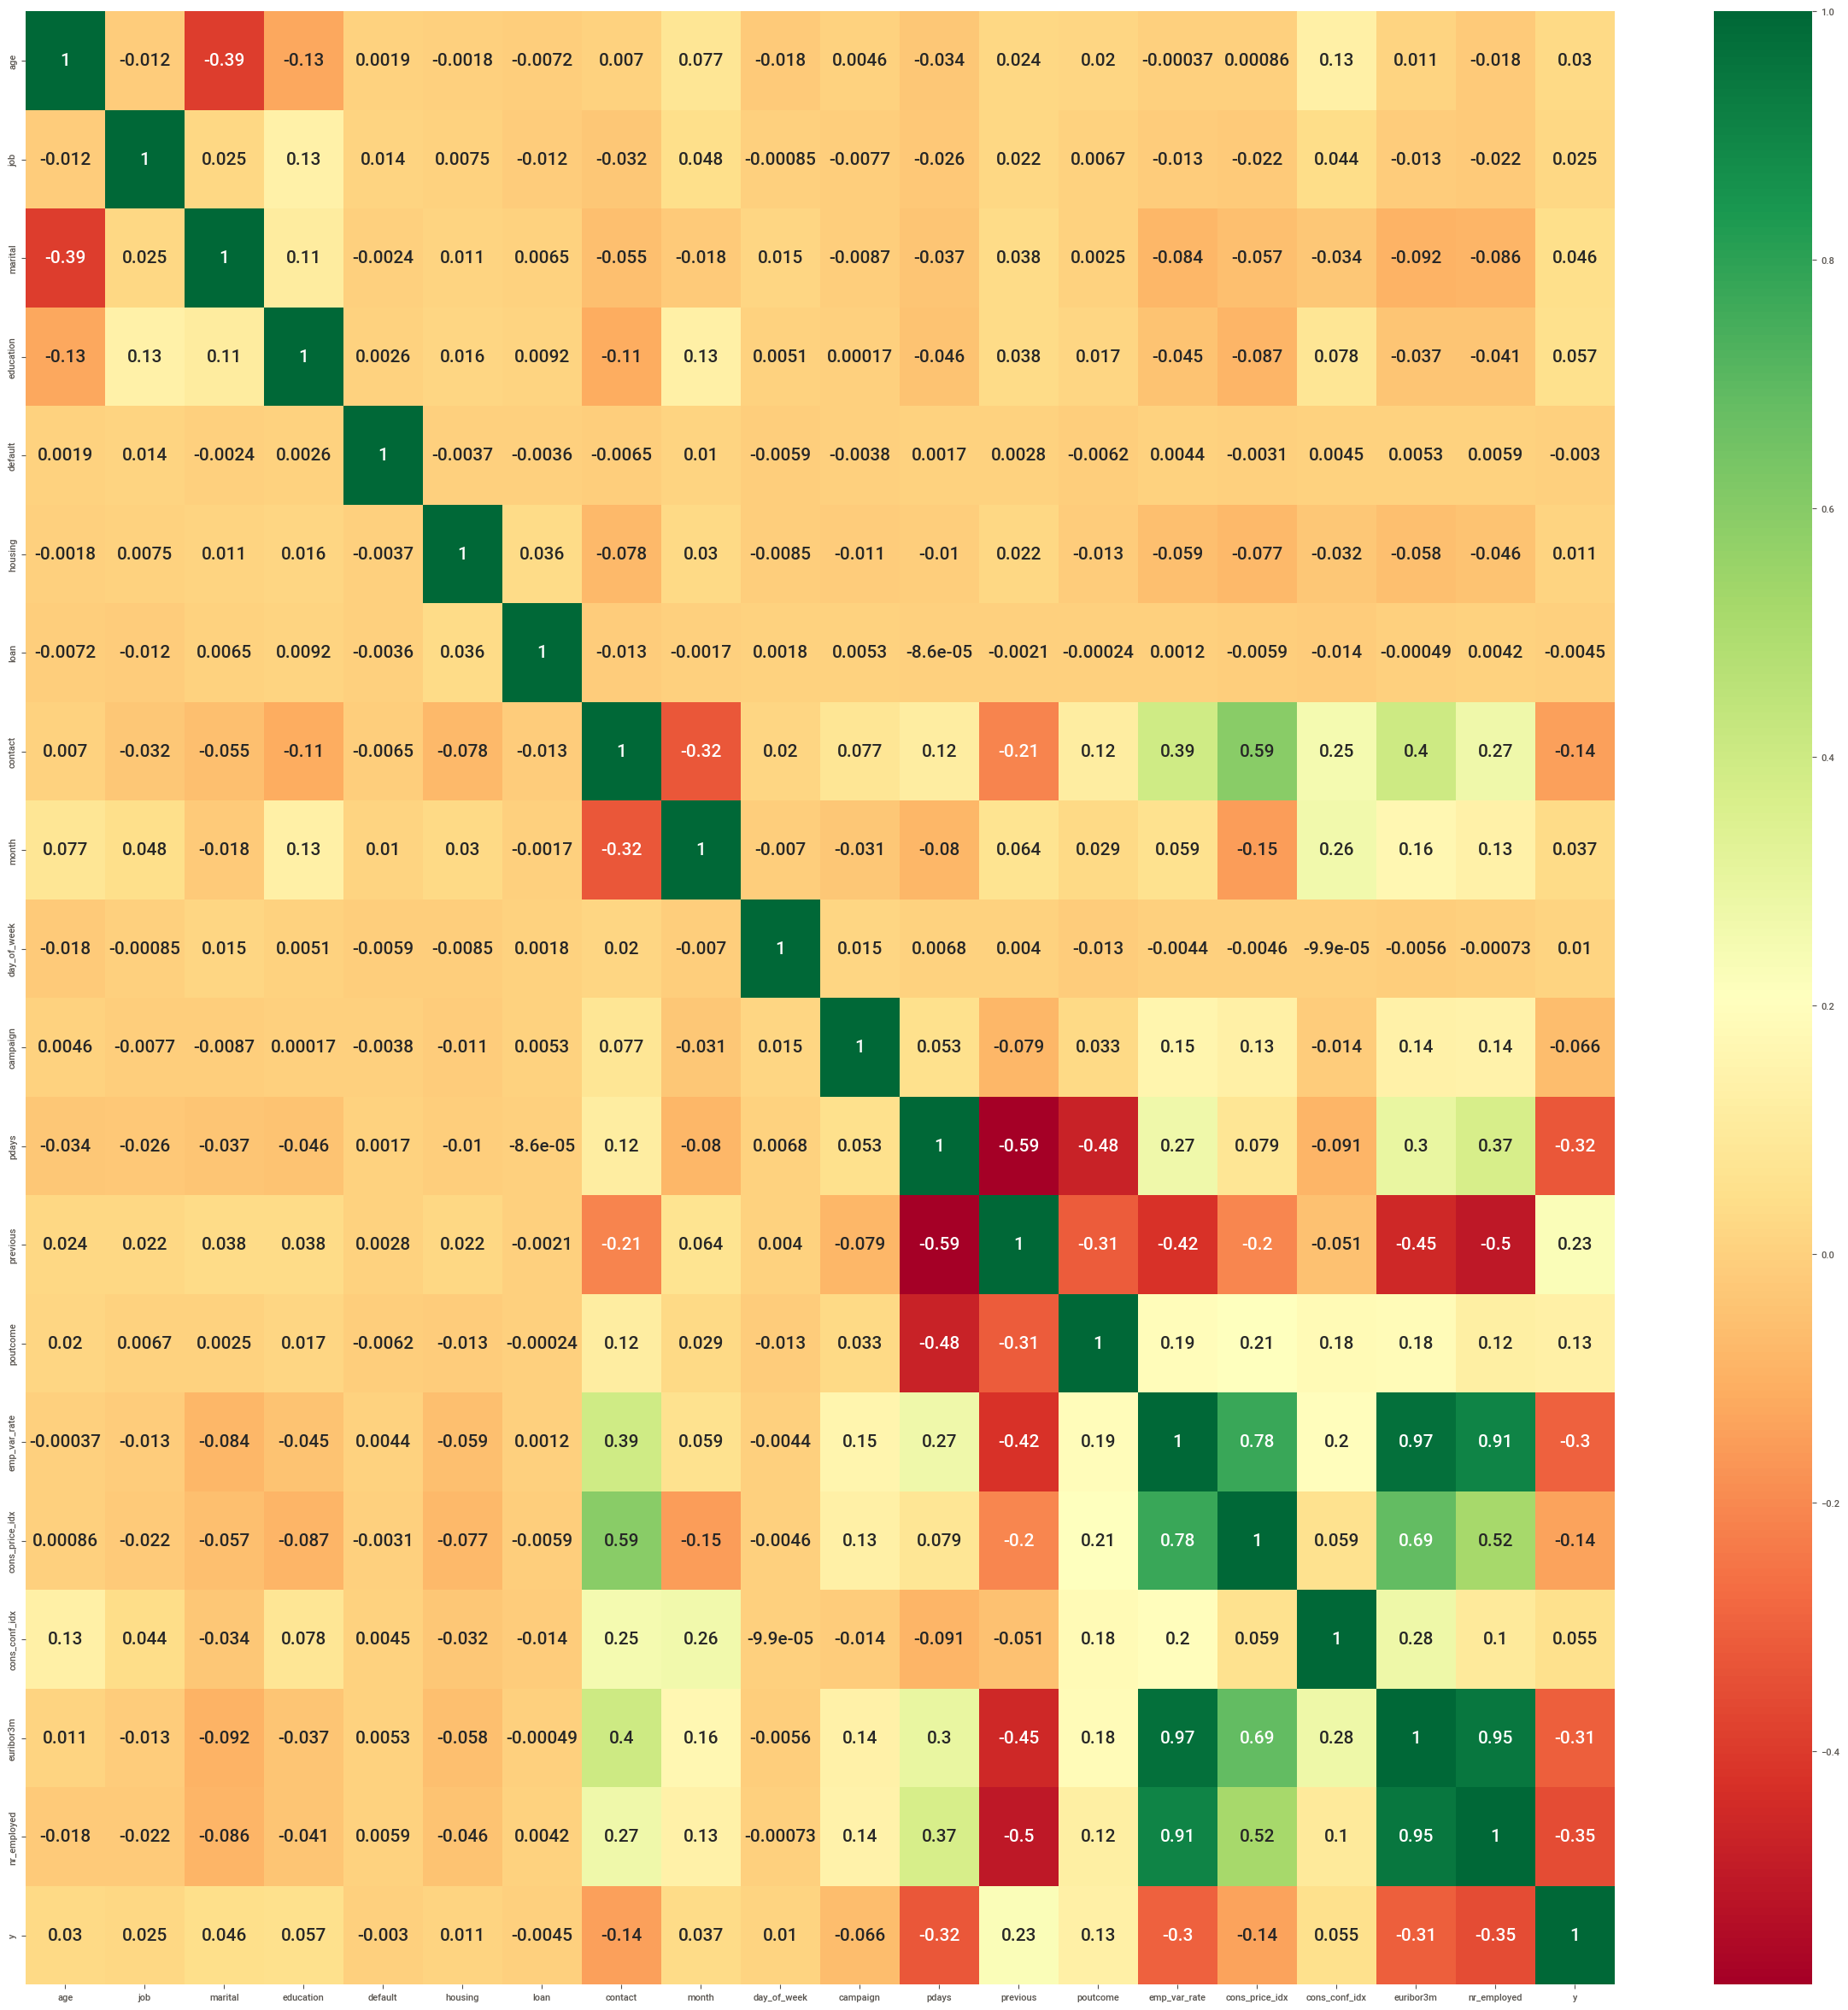

In [49]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

### Splitting the data

In [50]:
## x,y split

x = data.drop(['y'],axis=1)
y = data.y

In [51]:
## Train,test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state=35)

In [52]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32950, 19)
(32950,)
(8238, 19)
(8238,)


### Model implementation

### Model1: Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_pred = model.predict(x_test)

In [55]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model evaluation

In [56]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [57]:
#checking accuracy score
acc1= accuracy_score(y_test,y_pred)
acc1

0.8982762806506434

In [58]:
precision_score(y_test,y_pred)

0.6277602523659306

In [59]:
recall_score(y_test,y_pred)

0.21653971708378672

In [60]:
f1_score(y_test,y_pred)

0.32200647249190933

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7319
           1       0.63      0.22      0.32       919

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238



In [62]:
roc_auc_score(y_test,y_pred)

0.6002086479940042

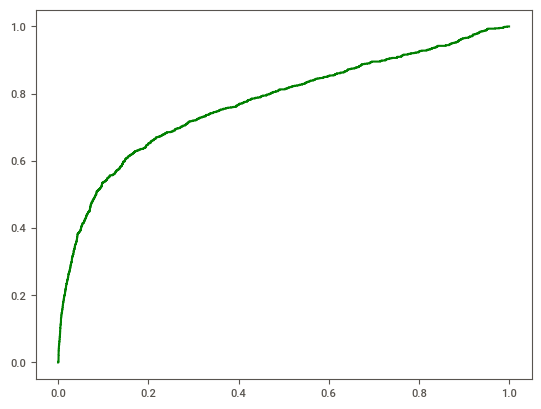

In [63]:
# roc_auc
 
y_predict= model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_predict)
plt.plot(fpr,tpr,color='green')
plt.show()

### Model2: Decision tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
y_pred_dt = model_dt.predict(x_test)

In [66]:
 accuracy_score(y_test,y_pred_dt)


0.8362466618111192

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7319
           1       0.63      0.22      0.32       919

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238



In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
params = {
    "criterion":("gini","entropy"),
    "max_depth":(list(range(1,20))),
    "min_samples_split":[2,3,4],
    "min_samples_leaf":list(range(1,20)),
}

In [70]:
tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf,params,scoring="f1",n_jobs=-1, verbose=1, cv=3)

In [71]:
tree_cv.fit(x_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 2166 candidates, totalling 6498 fits
Best paramters: {'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 19, 'min_samples_split': 2})


In [72]:
model_dt_1= DecisionTreeClassifier(criterion= "gini",max_depth = 18, min_samples_leaf = 19, min_samples_split = 2)

In [73]:
model_dt_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=18, min_samples_leaf=19)

In [74]:
y_test_pred_dt = model_dt_1.predict(x_test)
acc2 = accuracy_score(y_test,y_test_pred_dt)
acc2

0.8959698956057296

In [75]:
print(classification_report(y_test,y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7319
           1       0.57      0.27      0.36       919

    accuracy                           0.90      8238
   macro avg       0.74      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238



### Model3: Random forest 

In [76]:
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
y_pred_rf= model_rf.predict(x_test)

In [78]:
accuracy_score(y_test,y_pred_rf)

0.8917212915756252

In [79]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7319
           1       0.53      0.29      0.37       919

    accuracy                           0.89      8238
   macro avg       0.72      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



In [80]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x)for x in np.linspace(start=200,stop = 2000, num=10 )]
max_features = ['auto','sqrt']
max_depth = [int(x)for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

min_samples_split= [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap=[True,False]

In [81]:
random_grid = {'n_estimators':n_estimators,'max_features':max_features,
               'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
rf_clf1 = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf1,scoring='f1',param_distributions=random_grid,n_iter=100,cv=3,
                                verbose=2,random_state=42,n_jobs=-1)

In [82]:
rf_cv.fit(x_train,y_train)
rf_best_params=rf_cv.best_params_
print(f"Best paramters:{rf_best_params}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters:{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [83]:
model_rf_1= RandomForestClassifier(n_estimators= 1400,min_samples_split=5,min_samples_leaf=2,max_features='sqrt',max_depth=None,bootstrap=False)
model_rf_1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1400)

In [84]:
y_pred_rf_1=model_rf_1.predict(x_test)
acc3= accuracy_score(y_test,y_pred_rf_1)
acc3

0.8942704539936878

### Model comparison report

In [85]:
results=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier',],
                    'Accuracy Score':[acc1, acc2, acc3,]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df


,Accuracy Score
Model,
LogisticRegression,0.898276
DecisionTreeClassifier,0.895970
RandomForestClassifier,0.894270


In [87]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results_e2 = []
names_e2 = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2.append(cv_results)
    names_e2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.099970 (0.006168)
DT: -0.159484 (0.006913)
RF: -0.107314 (0.005789)


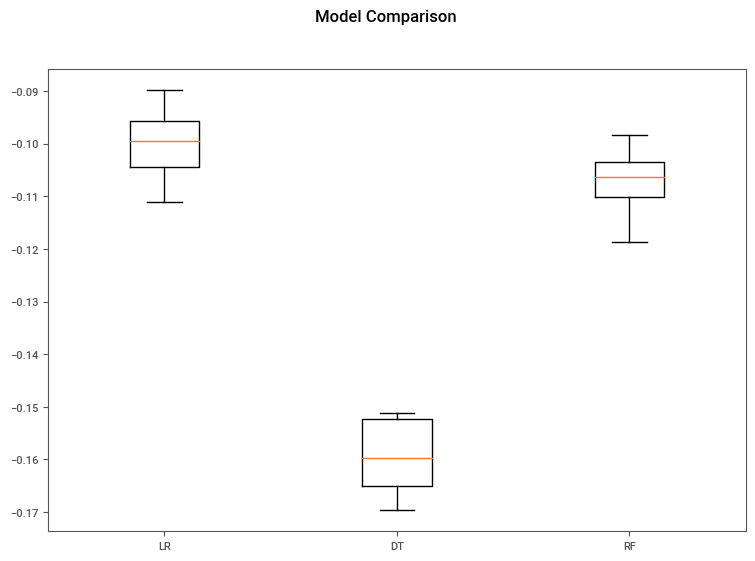

In [89]:
#plot the results

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2)

fig.suptitle('Model Comparison')
ax.set_xticklabels(names_e2)
plt.show()

### Conclusion

- By applying logistic regression, Decision tree classifier and Randomforest classifier the model was succesfully bulit. In this logistic regression performs well. using these  model, the bank will be able to predict a customer's response to its telemarketing campaign before calling the customer. In this way, the bank can allocate more marketing efforts to the clients who are classified as high likely to accept term deposits, and call less to those who are unlikely to make term deposits.

### Suggestion

- While implementing a marketing strategy, external factors such as the time of calling should also be   considered. The analysis says that May,june,july and aug had the high term deposit.


- The bank will receive an increasing number of positive responses by focusing on the correct clients,   and the classification algorithms will eventually remove the imbalance present in the initial         dataset. As a result, the bank will receive more precise information to help with subscriptions. In   the interim, the bank should review the substance and layout of its existing campaign to make it       more enticing to its target audience and raise the possibility of subscription. 


- The bank can offer better banking services if it has a more detail of its customers.
  For instance, a customer's loan status reveals his or her total risk profile, while their marital     status and occupation tell their stage of life. The bank can determine when a customer might need to   make an investment using this information. By offering banking services to the appropriate customer   at the right moment, the bank can achieve its customer demand.
